# Exploratory data analysis of a supermarket sales dataset


This project consists of a exploratory data analysis from  supermarkets data downloaded from [kaggle](https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales). The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data. The goal is to answer the following questions about the dataset:

1. How many purchases were recorded at each hour of the day during the last 3 months?
2. How the sales were distributed along the weekdays?
3. How the location affect the average sales?
4. Which product lines present the higgest average sales?
5. Are the product lines with higgest average sales better evaluated?
6. Which gender spend more in average?
7. How Gender affect product lines preference?
8. What are the favorite payment methods per customer type?

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the data

In [2]:

df=pd.read_csv(r'C:\Users\Fernando\Documents\Projects\supermarket-sales\supermarket_sales.csv', parse_dates=[['Date','Time']])

df.head()

,Date_Time,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating
0,2019-01-05 13:08:00,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1
1,2019-03-08 10:29:00,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6
2,2019-03-03 13:23:00,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4
3,2019-01-27 20:33:00,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4
4,2019-02-08 10:37:00,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3


## Analysing the dtype, and non-null values of the columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date_Time                1000 non-null   datetime64[ns]
 1   Invoice ID               1000 non-null   object        
 2   Branch                   1000 non-null   object        
 3   City                     1000 non-null   object        
 4   Customer type            1000 non-null   object        
 5   Gender                   1000 non-null   object        
 6   Product line             1000 non-null   object        
 7   Unit price               1000 non-null   float64       
 8   Quantity                 1000 non-null   int64         
 9   Tax 5%                   1000 non-null   float64       
 10  Total                    1000 non-null   float64       
 11  Payment                  1000 non-null   object        
 12  cogs                     1000 non-n

## Analysing unique values of object dtype columns.

In [4]:
for i in ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']:
    print(df[i].unique())

['A' 'C' 'B']
['Yangon' 'Naypyitaw' 'Mandalay']
['Member' 'Normal']
['Female' 'Male']
['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories']
['Ewallet' 'Cash' 'Credit card']


##### As we saw, the columns 'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment' have a dtype object, but is more convenient set them as 'category' dtype, since they have a few numbers of unique values.

## Setting the correct dtype of columns

In [5]:
for i in ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']:
    df[i]=df[i].astype('category')
print(df.dtypes)

Date_Time                  datetime64[ns]
Invoice ID                         object
Branch                           category
City                             category
Customer type                    category
Gender                           category
Product line                     category
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Payment                          category
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object


### 1) How many purchases were recorded at each hour of the day during the last 3 months?

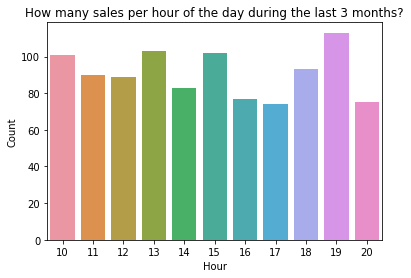

In [6]:
df['Time']=df['Date_Time'].dt.time
df['Hour']=df['Date_Time'].dt.hour


sns.countplot(x='Hour',data=df)
plt.ylabel('Count')
plt.xlabel('Hour')
plt.title('How many sales per hour of the day during the last 3 months?')
plt.show()

#### So it is possible to conclude that most of the sales happen at 7 pm, followed by 1pm, 3pm and 10am respectively. 

### 2) How the average sales were distributed along the weekdays?

<AxesSubplot:title={'center':'Mean Purchases($) by Weekday during the first 3 months of 2021'}, xlabel='Mean Purchases ($)', ylabel='Weekday'>

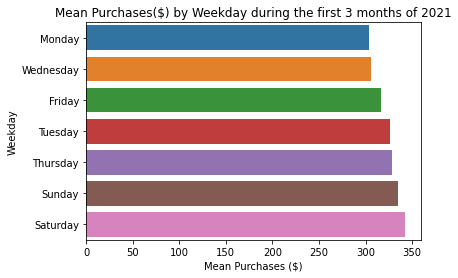

In [7]:
dict={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
df['Weekday']=df['Date_Time'].dt.weekday.replace(dict)
salesbyweekday=df.groupby('Weekday', as_index=False)['Total'].mean()
salesbyweekday=salesbyweekday.rename(columns={'Total':'Mean Purchases ($)'})


plt.title('Mean Purchases($) by Weekday during the first 3 months of 2021')
sns.barplot(y='Weekday',x='Mean Purchases ($)',data=salesbyweekday,order=salesbyweekday.sort_values('Mean Purchases ($)').Weekday, orient='h');


#### Through the graph above it is possible visualize that during weekends the products were best sold, while Monday shows the least number. A possible explanation for this variation could be the fact that weekends are the day when most of the people do not work, so have more time available for shopping.  

### 3) How the location affect the average sales?

Text(0.5, 0, 'City')

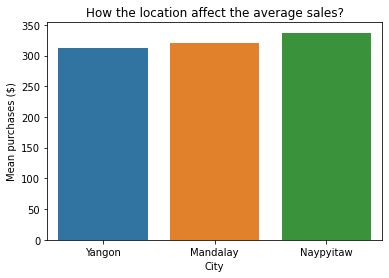

In [8]:
salesbycity=df.groupby('City', as_index=False)['Total'].mean()

sns.barplot(x='City',y='Total',data=salesbycity,order=salesbycity.sort_values('Total').City)
plt.title('How the location affect the average sales?')
plt.ylabel('Mean purchases ($)')
plt.xlabel('City')

#### You can visualize that the Mean purchases are higher for Naypitaw followed by Mandalay and Yangon respectively.

### 4) Which product lines present the higgest average sales?

Text(0.5, 1.0, 'Average sales of each product line')

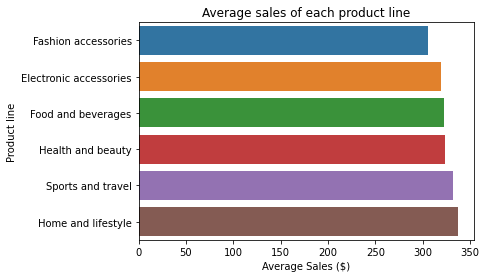

In [9]:
salesbyline=df.groupby('Product line',as_index=False)['Total'].mean()
sns.barplot(y='Product line',x='Total',data=salesbyline,order=salesbyline.sort_values('Total')['Product line'],orient='h')
plt.xlabel('Average Sales ($)')
plt.title('Average sales of each product line')


#### The product lines with higgest average sales are home and lifestyle, followed by Sports and travel and Health and beauty, respectively.

### 5) Are the product lines with higgest average sales better evaluated?

Text(0.5, 1.0, 'Mean Rating for each product line')

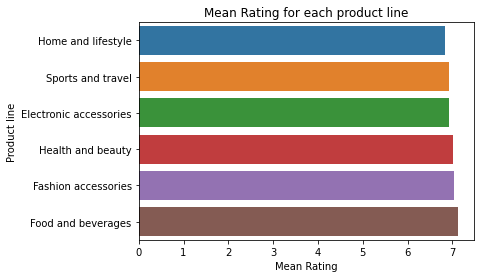

In [10]:
salesbyrating=df.groupby('Product line',as_index=False)['Rating'].mean()
sns.barplot(y='Product line',x='Rating',data=salesbyrating, order=salesbyrating.sort_values('Rating')['Product line'],orient='h')
plt.xlabel('Mean Rating')
plt.title('Mean Rating for each product line')


#### As it is possible to observe from the last two figures, the products with higger average sales (Home and lifestyle and Sports and travel) are the least evaluated, so the correct answer for the question is "no".

### 6) Which gender spent more in average?

Text(0.5, 1.0, 'Which gender spent more in average?')

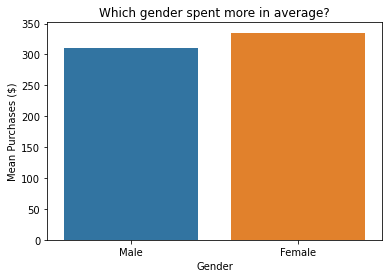

In [11]:
salesbygender=df.groupby('Gender', as_index=False)['Total'].mean()

sns.barplot(x='Gender',y='Total',data=salesbygender,order=salesbygender.sort_values('Total').Gender)
plt.ylabel('Mean Purchases ($)')
plt.title('Which gender spent more in average?');

#### The average females have purchased considerably more in this supermarket.

### 7) Does gender affect the product line preference? 

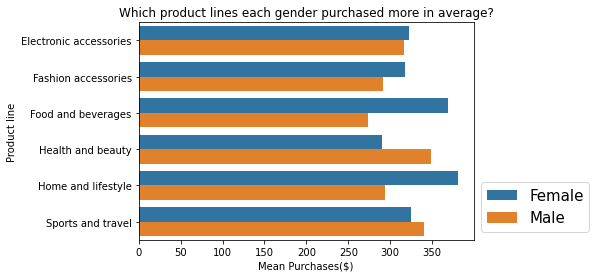

In [16]:
sns.barplot(y='Product line',x='Total',data=df,hue='Gender', orient='h',ci=None)
plt.xlabel('Mean Purchases($)')
plt.title('Which product lines each gender purchased more in average?')
plt.legend(bbox_to_anchor=(1,0.3,0,0),fontsize=15);

#### We can observe that Males used to spend more with health and beauty products while average females bought more "Food and beverages" and "Home and lifestyle" product lines.

### 8) What are the favorite payment methods per customer type?

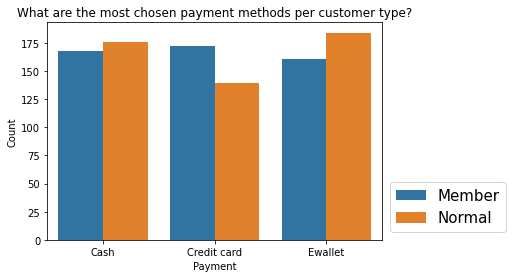

In [17]:
sns.countplot(x='Payment',hue='Customer type',data=df)
plt.ylabel('Count')
plt.title('What are the most chosen payment methods per customer type?')
plt.legend(bbox_to_anchor=(1,0.3,0,0),fontsize=15);

#### It is possible to notice that Members customers tend to buy more with Credit card, while Normal customers with Cash and Ewallet.